# Scaling of number of states

Here, we analyze the scaling of the number of states in the MDP, by measuring the number of states explored by our policy iteration algorithm.

The figures produced in this notebook are used in our paper ([arXiv:2207.06533](https://arxiv.org/abs/2207.06533)).

In [1]:
import numpy as np
import random
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
import pickle
from pathlib import Path
import functools
import os
import time
import datetime
import sys
import importlib as imp

import matplotlib.pyplot as plt

# Dark background?
dark = False
if dark==True:
    plt.style.use('dark_background')
else:
    plt.style.use('default')

from matplotlib import rc
rc('text', usetex=True)
from matplotlib import colors as pltc
from matplotlib.cm import ScalarMappable
import matplotlib.ticker as ticker

import main
from environment import Environment

%matplotlib inline

# Create figures directory if needed
try:
    os.mkdir('MANUSCRIPT_figs')
except FileExistsError:
    pass

In [2]:
## Plot specs ##

x_cm = 8
y_cm = 5

normal_fontsize = 10
small_fontsize = 8

<br/>

<br/>


---


## Plots vs $n$

In [3]:
## Data ##
p = 0.9
p_s = 1
cutoff = 1
tolerance = 1e-2

n_array = np.arange(3,8)

In [4]:
## Calculations ##
imp.reload(main)
n_array = np.round(n_array,0)

total_states_n = []
nonabsorbing_states_n = []
decision_states_n = []

for n in n_array:
    if main.check_policyiter_data(n, p, p_s, cutoff, tolerance):
        _, state_info, _ = main.load_policyiter_data(n, p, p_s, cutoff, tolerance)
        c_total, c_nonabs, c_decision, _, _, _ = main.classify_states_policyiter(state_info)
        total_states_n += [c_total]
        nonabsorbing_states_n += [c_nonabs]
        decision_states_n += [c_decision]
    else:
        print('Data missing: n=%s, p=%.3f, p_s=%.3f, tc=%s, tolerance=%s'%(n,p,p_s,cutoff,tolerance))

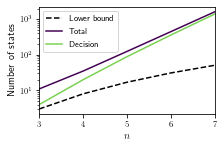

In [5]:
## Plot number of states ##

fig, ax = plt.subplots(figsize=(x_cm/2.54, y_cm/2.54))

cmap = plt.cm.get_cmap('viridis')
if dark==True:
    colors = [cmap(0.6), cmap(0.8), cmap(0.99)]
    colorbound = 'w'
else:
    colors = [cmap(0), cmap(0.45), cmap(0.8)]
    colorbound = 'k'

# Lower bound
low_bound_n = 1 + (n_array**2 - n_array - 4)*cutoff/2
low_bound_n += (n_array**2 - n_array - 6)*(n_array-2)*cutoff**2/6
low_bound_n += cutoff**(n_array-1)

plt.plot(n_array, low_bound_n,
         label=r'Lower bound', linestyle='--', color=colorbound, zorder=1)

# Values from the algorithm
style_index = 0
plt.plot(n_array, total_states_n, label=r'Total',
         color=colors[style_index], zorder=-style_index)

#style_index = 1
#plt.plot(n_array, nonabsorbing_states_n, label=r'Non-absorbing',
#         color=colors[style_index], zorder=-style_index)

style_index = 2
plt.plot(n_array, decision_states_n, label=r'Decision',
         color=colors[style_index], zorder=-style_index)

# Plot specs
plt.xlabel(r'$n$', fontsize=normal_fontsize)
plt.ylabel(r'Number of states', fontsize=normal_fontsize)
ax.tick_params(labelsize=small_fontsize)
plt.legend(fontsize=small_fontsize)

plt.xlim(np.min(n_array), np.max(n_array))

plt.yscale('log')

if dark==True:
    filename = 'MANUSCRIPT_figs/DARK_states_n_p%.3f_ps%.3f_tc%s_tol%s.pdf'%(p, p_s, cutoff, tolerance)
else:
    filename = 'MANUSCRIPT_figs/states_n_p%.3f_ps%.3f_tc%s_tol%s.pdf'%(p, p_s, cutoff, tolerance)
plt.savefig(filename, dpi=300, bbox_inches='tight')

<br/>

<br/>


---


## Plots vs $t_\mathrm{cut}$

In [6]:
## Data ##
n = 4
p = 0.9
p_s = 1
tolerance = 1e-2

cutoff_array = np.arange(1,16)

In [7]:
## Calculations ##
imp.reload(main)
cutoff_array = np.round(cutoff_array,0)

total_states_tc = []
nonabsorbing_states_tc = []
decision_states_tc = []

for cutoff in cutoff_array:
    if main.check_policyiter_data(n, p, p_s, cutoff, tolerance):
        _, state_info, _ = main.load_policyiter_data(n, p, p_s, cutoff, tolerance)
        c_total, c_nonabs, c_decision, _, _, _ = main.classify_states_policyiter(state_info)
        total_states_tc += [c_total]
        nonabsorbing_states_tc += [c_nonabs]
        decision_states_tc += [c_decision]
    else:
        print('Data missing: n=%s, p=%.3f, p_s=%.3f, tc=%s, tolerance=%s'%(n,p,p_s,cutoff,tolerance))

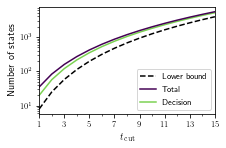

In [8]:
## Plot number of states ##

fig, ax = plt.subplots(figsize=(x_cm/2.54, y_cm/2.54))

cmap = plt.cm.get_cmap('viridis')
if dark==True:
    colors = [cmap(0.6), cmap(0.8), cmap(0.99)]
    colorbound = 'w'
else:
    colors = [cmap(0), cmap(0.45), cmap(0.8)]
    colorbound = 'k'    

# Lower bound
low_bound_tc = 1 + (n**2 - n - 4)*cutoff_array/2 + (n**2 - n - 6)*(n-2)*cutoff_array**2/6
low_bound_tc += cutoff_array**(n-1)

plt.plot(cutoff_array, low_bound_tc,
         label=r'Lower bound', linestyle='--', color=colorbound, zorder=1)

# Values from the algorithm
style_index = 0
plt.plot(cutoff_array, total_states_tc, label=r'Total',
         color=colors[style_index], zorder=-style_index)

#style_index = 1
#plt.plot(n_array, nonabsorbing_states_n, label=r'Non-absorbing',
#         color=colors[style_index], zorder=-style_index)

style_index = 2
plt.plot(cutoff_array, decision_states_tc, label=r'Decision',
         color=colors[style_index], zorder=-style_index)

# Plot specs
plt.xlabel(r'$t_\mathrm{cut}$', fontsize=normal_fontsize)
plt.ylabel(r'Number of states', fontsize=normal_fontsize)
ax.tick_params(labelsize=small_fontsize)
plt.legend(fontsize=small_fontsize)

ax.set_xticks(np.arange(1,16,2))
# Minor x-tick frequency
x_minor_intervals = 2
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(x_minor_intervals))

plt.xlim(np.min(cutoff_array), np.max(cutoff_array))

plt.yscale('log')

if dark==True:
    filename = 'MANUSCRIPT_figs/DARK_states_tc_n%d_p%.3f_ps%.3f_tol%s.pdf'%(n, p, p_s, tolerance)
else:
    filename = 'MANUSCRIPT_figs/states_tc_n%d_p%.3f_ps%.3f_tol%s.pdf'%(n, p, p_s, tolerance)
plt.savefig(filename, dpi=300, bbox_inches='tight')